# Linear Regression and Logistic Regression 

#### *USA_housing.csv* and *affairs2.csv* datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### This HW is split into two part. In Part A we will be building a Linear Regression model using housing data while in Part B, we will build a Logistic Regression model. Note that some questions will carry more weights than the others. Question 3, 4, 7 and 8 will carry most weights  

### Part A

#### First let's build a Linear Regression model for a housing dataset

In [2]:
housing = pd.read_csv("USA_housing.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


### we can use simple scatter to check how the house price depends on different variables


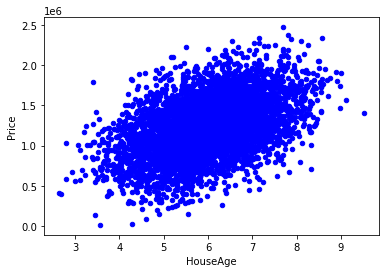

In [3]:
housing.plot(kind='scatter', x = "HouseAge", y = "Price", color = "blue")

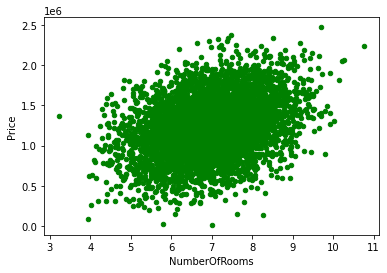

In [4]:
housing.plot(kind='scatter', x = "NumberOfRooms", y = "Price", color = "green")

### Question 1: Use a pairplot to see all the scatter plots with the numerical variables in one grid

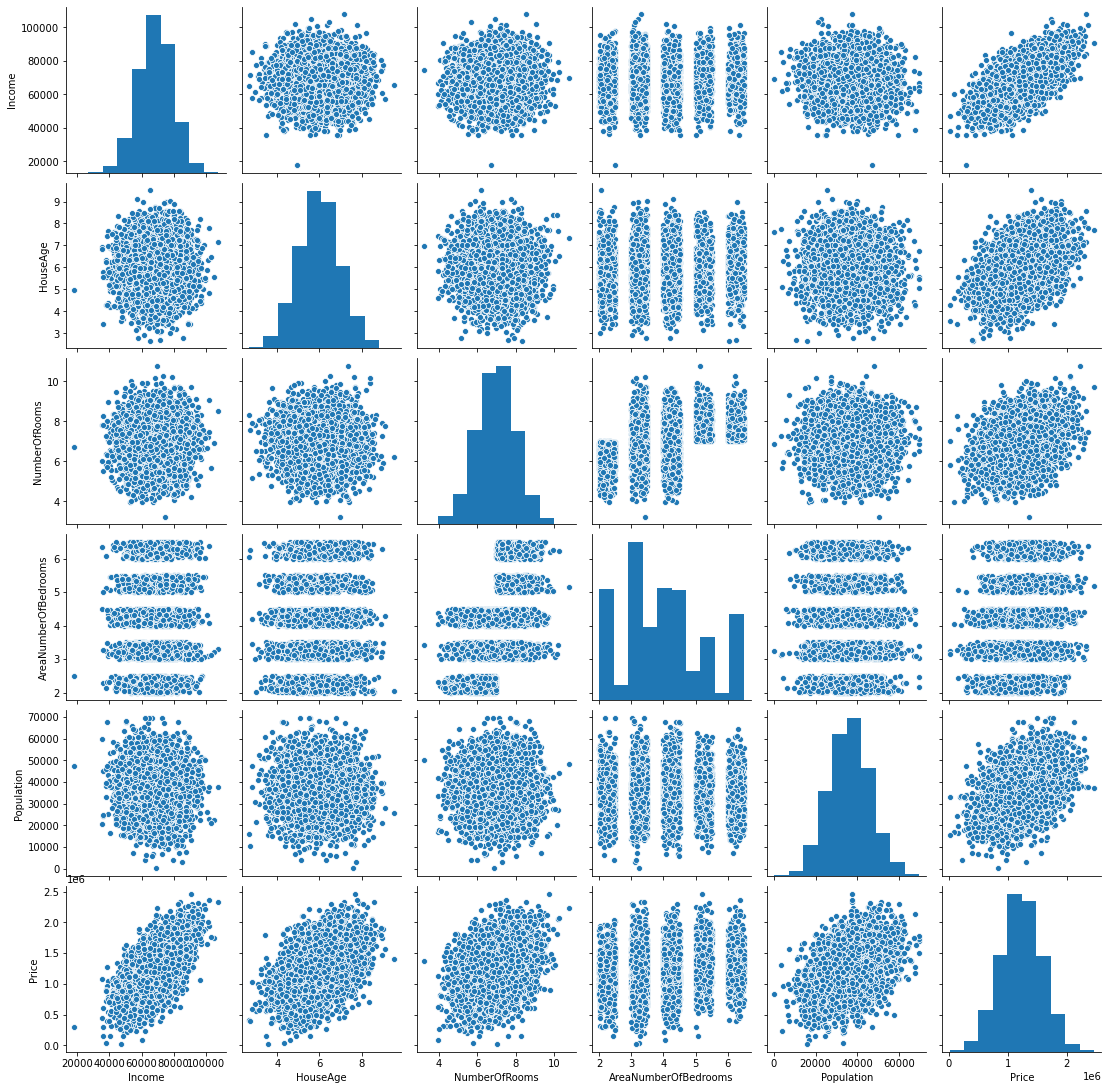

In [6]:
sns.pairplot(housing)

### Question 2: Use the above pairplot as well as calculating the correlation, pick one variable that affects the house price the most

In [7]:
print(housing.corr())
print("\n\n")

print("Income is the variable with the highest correlation with house price (0.64).")

# Show correlation and then answer which variable you will pick.
# Type your code and answer here

                        Income  HouseAge  NumberOfRooms  AreaNumberOfBedrooms  \
Income                1.000000 -0.002007      -0.011032              0.019788   
HouseAge             -0.002007  1.000000      -0.009428              0.006149   
NumberOfRooms        -0.011032 -0.009428       1.000000              0.462695   
AreaNumberOfBedrooms  0.019788  0.006149       0.462695              1.000000   
Population           -0.016234 -0.018743       0.002040             -0.022168   
Price                 0.639734  0.452543       0.335664              0.171071   

                      Population     Price  
Income                 -0.016234  0.639734  
HouseAge               -0.018743  0.452543  
NumberOfRooms           0.002040  0.335664  
AreaNumberOfBedrooms   -0.022168  0.171071  
Population              1.000000  0.408556  
Price                   0.408556  1.000000  



Income is the variable with the highest correlation with house price (0.64).


### Question 3: Use that variable to build a one-variable Linear Regression model of the house price. Make sure you split the data between Training and Testing set first, Save 20% as your testing data. Show your R-square and RMSE

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
Xarray = housing['Income'].values
Yarray = housing['Price'].values

In [10]:
X = Xarray.reshape(-1, 1)
Y = Yarray.reshape(-1, 1)

In [11]:
model1 = LinearRegression()
model1.fit(X, Y)

LinearRegression()

In [12]:
print(model1.intercept_)
print(model1.coef_)

[-221579.47822252]
[[21.19548317]]


In [13]:
Y_pred = model1.predict(X)

In [14]:
Y_pred

array([[1464424.95032392],
       [1458133.78924722],
       [1077429.52286549],
       ...,
       [1122016.75902953],
       [1219741.59376302],
       [1166948.9559213 ]])

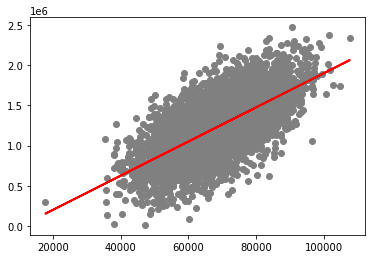

In [15]:
plt.scatter(X, Y, color = 'gray')
plt.plot(X, Y_pred, color = 'red', linewidth=2)
plt.show()

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4000, 1)
(1000, 1)
(4000, 1)
(1000, 1)


In [18]:
model2 = LinearRegression()
model2.fit(X_train, Y_train)
print(model2.intercept_)
print(model2.coef_)

[-224617.80110797]
[[21.24368249]]


In [19]:
print("Model 1 Intercept", model1.intercept_)
print("Model 2 Intercept", model2.intercept_)
print("Model 1 Coefficient", model1.coef_)
print("Model 2 Coefficient", model2.coef_)

Model 1 Intercept [-221579.47822252]
Model 2 Intercept [-224617.80110797]
Model 1 Coefficient [[21.19548317]]
Model 2 Coefficient [[21.24368249]]


In [20]:
Y_pred = model2.predict(X_test)

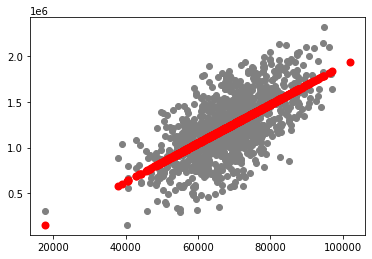

In [21]:
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [22]:
print('R-squared:', metrics.r2_score(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

R-squared: 0.4006059806785851
Root Mean Squared Error: 272184.4854520049


### Question 4: Now do a 10-fold Cross Validation of your model. Does your model pass cross validation?

In [23]:
import random

In [24]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

Trial 0, R-squared: 0.3773451677658801,  Slope: [[21.44453834]], Intercept: [-238294.35995516],  
Trial 1, R-squared: 0.3828958237099296,  Slope: [[21.17250819]], Intercept: [-221662.03473363],  
Trial 2, R-squared: 0.4227925716836891,  Slope: [[21.0241958]], Intercept: [-209804.15571892],  
Trial 3, R-squared: 0.41158969645797805,  Slope: [[21.19338464]], Intercept: [-221383.97651978],  
Trial 4, R-squared: 0.37235384910080616,  Slope: [[21.50235016]], Intercept: [-245338.84419882],  
Trial 5, R-squared: 0.44173590726775425,  Slope: [[21.13548116]], Intercept: [-214914.94154912],  
Trial 6, R-squared: 0.41749984978186117,  Slope: [[21.0537653]], Intercept: [-209822.11148707],  
Trial 7, R-squared: 0.3724819104862611,  Slope: [[21.50336262]], Intercept: [-245447.59376421],  
Trial 8, R-squared: 0.3966670102190162,  Slope: [[21.29100363]], Intercept: [-225110.81158206],  
Trial 9, R-squared: 0.3828958237099296,  Slope: [[21.17250819]], Intercept: [-221662.03473363],  


In [25]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,0.428172
1,1,0.409401
2,2,0.402798
3,3,0.378852
4,4,0.402161
5,5,0.427510
6,6,0.382463
7,7,0.420831
8,8,0.441194
9,9,0.377811


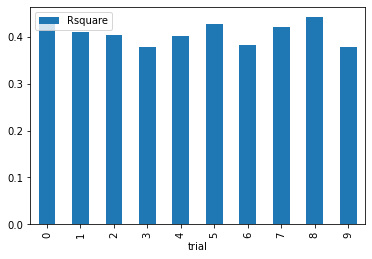

In [26]:
rdf.plot.bar(x='trial', y='Rsquare')

In [27]:
print("R-Square 10-Fold Cross Validation Mean: ", rdf['Rsquare'].mean(), "\n")
print("R-Squared Model 2: ", metrics.r2_score(Y_test, Y_pred), "\n")
print("Model Passes Cross Validation")

R-Square 10-Fold Cross Validation Mean:  0.4071192026782124 

R-Squared Model 2:  0.3778114939023276 

Model Passes Cross Validation


### Good Job.

### Part B:  Let's build a Logistic Regression model using the affairs data from
https://www.statsmodels.org/dev/datasets/generated/fair.html

#### DataSet Description

From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

In [28]:
# The dataset can be imported via the statsmodels like the following, but we are going to read from a csv file
# provided by the professor
# import statsmodels.api as sm
# orig_df = sm.datasets.fair.load_pandas().data

df = pd.read_csv("affairs2.csv")
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666


Now, create a new column called 'had_affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1

In [29]:
# has_affair
def has_affair(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['had_affair'] = df['affairs'].apply(has_affair)

In [30]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666,1


In [31]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
6466,5.0,32.0,13.0,2.0,3.0,17.0,occ4,3.0,0.0,0
6467,4.0,32.0,13.0,1.0,1.0,16.0,occ5,5.0,0.0,0
6468,5.0,22.0,2.5,0.0,2.0,14.0,occ3,1.0,0.0,0
6469,5.0,32.0,6.0,1.0,3.0,14.0,occ3,4.0,0.0,0
6470,4.0,22.0,2.5,0.0,2.0,16.0,occ2,4.0,0.0,0


#### Let's do some exploratory data analysis. First check and remove missing values

### Question 5: Use a seaborn heatmap similar to what has shown in class to show if there are any missing values. Simply drop the rows that have missing values

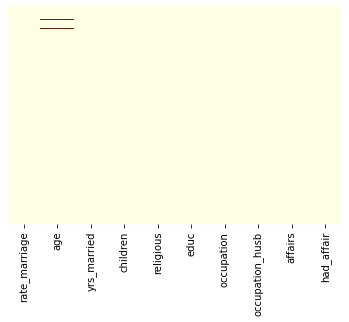

In [32]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlOrBr')

# heatmap = sns.heatmap(housing.corr(), vmin= 0, vmax=1, annot=True, cmap='YlOrBr')

In [33]:
df = df.dropna()

After dropping the NA, run the df.isnull().sum(), it should show 0 for every features

In [34]:
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
had_affair         0
dtype: int64

### Now, let's group by has or no affairs rows

In [35]:
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation_husb,affairs
had_affair,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.884559,2.187243


So, one can see older woman who has married longer will have higher chance of having an affairs

We can also use Factorplot to see the effect from age

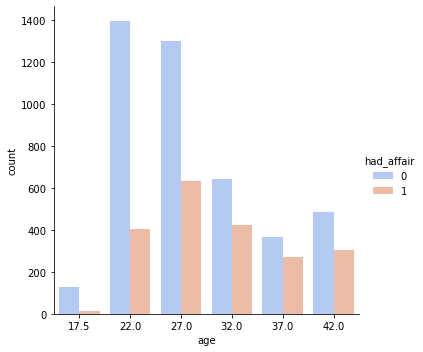

In [36]:
# Use Factorplot for age
sns.factorplot('age', kind='count', hue='had_affair', data=df,palette='coolwarm')

By looking at the ratio between the has_affair=1 versus has_affair=0, one can see that the older the woman, the higher the probability of having an affair

We can do the same thing for other variables such as years of marriage, number of children etc

### Question 6: Call factorplot for years of marriage, and number of children. Comment on whether you think they are importance factors

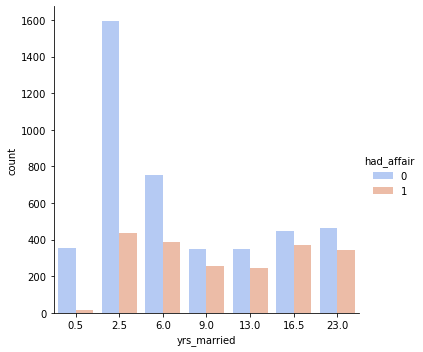

In [37]:
# Use Factorplot for Years of Marriage
sns.factorplot('yrs_married', kind='count', hue='had_affair', data=df,palette='coolwarm')

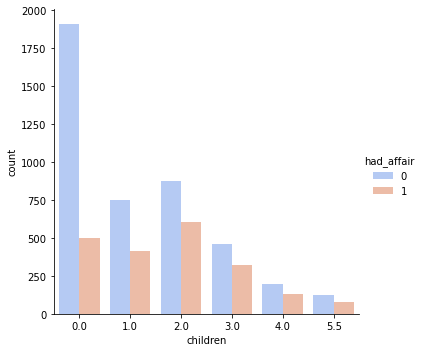

In [38]:
# Use Factorplot for Number of Children
sns.factorplot('children', kind='count', hue='had_affair', data=df,palette='coolwarm')

In [39]:
print("According to the factorplot for years of marriage, the probability of an affair increases as the number of years married increases.", "\n")
print("According to the factorplot for children, the probabiltiy of an affair decreases as the number of children increases.")

According to the factorplot for years of marriage, the probability of an affair increases as the number of years married increases. 

According to the factorplot for children, the probabiltiy of an affair decreases as the number of children increases.


### Question 7: build a logistic regression model with only Age, Number of years married, number of children, education, religious to forecast had_affair. Remember to do the Train Test Split first

type your work here

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [41]:
# Hint:
# create a df2 from df with all the age, years of married, ... columns
# call train_test_split, remember to drop the had_affair columns in your X variables, Y should be had_affair
# create a LogisticRegression object and call its fit method
# call the classification report and print accuracy score

In [42]:
train = df

In [43]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('had_affair',axis=1), 
                                                    train['had_affair'], test_size=0.20, 
                                                    random_state=101)

In [44]:
df2 = train.drop(['rate_marriage', 'occupation', 'occupation_husb', 'affairs'], 1)
df2

,age,yrs_married,children,religious,educ,had_affair
0,32.0,9.0,3.0,3.0,17.0,1
1,27.0,13.0,3.0,1.0,14.0,1
2,22.0,2.5,0.0,1.0,16.0,1
3,37.0,16.5,4.0,3.0,16.0,1
4,27.0,9.0,1.0,1.0,14.0,1
...,...,...,...,...,...,...
6466,32.0,13.0,2.0,3.0,17.0,0
6467,32.0,13.0,1.0,1.0,16.0,0
6468,22.0,2.5,0.0,2.0,14.0,0
6469,32.0,6.0,1.0,3.0,14.0,0


In [45]:
train = df2

In [46]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('had_affair',axis=1), 
                                                    train['had_affair'], test_size=0.20, 
                                                    random_state=101)

In [47]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [48]:
predictions = model.predict(X_test)

In [49]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.95      0.80       850
           1       0.62      0.17      0.26       424

    accuracy                           0.69      1274
   macro avg       0.66      0.56      0.53      1274
weighted avg       0.67      0.69      0.62      1274

0.6883830455259027


### Question 8: Now, call a countplot to show the dependence of the affair on occupation, then include the occupation categorical variable to build a better model

type your work here

In [50]:
# call sns.countplot for occupation using the original df dataframe

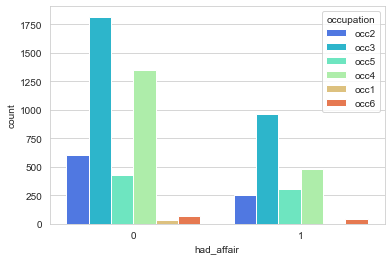

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='had_affair',hue='occupation',data=df,palette='rainbow')

In [52]:
# call the get_dummies method for the occupation variable

In [53]:
occupation = pd.get_dummies(df['occupation'])

In [54]:
occupation

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
6466,0,0,0,1,0,0
6467,0,0,0,0,1,0
6468,0,0,1,0,0,0
6469,0,0,1,0,0,0


In [55]:
# create a df3 which is combining df2 with this new set of dummy variables using pd.concat method

In [56]:
df3 = pd.concat([df2, occupation], axis=1)

In [57]:
# now you have a df3 with 10 features 
# call train test split and do the usual model fitting and model performance things

In [58]:
train = df3

In [59]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('had_affair',axis=1), 
                                                    train['had_affair'], test_size=0.20, 
                                                    random_state=101)

In [60]:
model2 = LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

In [61]:
predictions2 = model2.predict(X_test)

In [62]:
print(classification_report(y_test, predictions2))
print(accuracy_score(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       850
           1       0.61      0.19      0.29       424

    accuracy                           0.69      1274
   macro avg       0.66      0.57      0.55      1274
weighted avg       0.67      0.69      0.63      1274

0.6907378335949764


## Question 9: Can you comment on your results based on the performance metrics (Precision, Recall and Accuracy Score)?

In [1]:
print("Compared with the first model, the inclusion of occupations decreased the precision from .62 to .61")
print("Compared with the first model, the inclusion of occupations increased recall from 0.17 to 0.19")
print("Compared with the first model, the inclusion of occupations only marginally improved the accuracy from .688 to .691")

Compared with the first model, the inclusion of occupations decreased the precision from .62 to .61
Compared with the first model, the inclusion of occupations increased recall from 0.17 to 0.19
Compared with the first model, the inclusion of occupations only marginally improved the accuracy from .688 to .691
